R_t, R_(t+1) = (P_(t+1) - P_t)/P_t
O alternativamente
R_t, R_(t+1) = (P_(t+1) / P_t) -1

In [4]:
from Cython.Shadow import returns

precios_a = [8.70, 8.91, 8.71]
print((precios_a[1]/precios_a[0]) - 1)
print((precios_a[2]/precios_a[1]) - 1)

0.024137931034482918
-0.022446689113355678


### ¿Que representa esto?

El porcentaje obtenido (%) de una compra y venta de un activo; esto se desgloza de la siguiente manera

(Precio de venta / precio de compra) menos 1, para obtener un numero decimal que representa el % de retorno de nuestra accion

In [6]:
import numpy as np
precios_a = np.array(precios_a)
precios_a

array([8.7 , 8.91, 8.71])

In [9]:
array_retornos = (precios_a[1:] / precios_a[:-1]) - 1
array_retornos

array([ 0.02413793, -0.02244669])

In [11]:
import pandas as pd
precios = pd.DataFrame({"BLUE":   [8.70, 8.91, 8.71, 8.43, 8.73] ,
                        "ORAGNE": [10.66, 11.08, 10.71, 11.59, 12.11]
                        })
precios

,BLUE,ORAGNE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [12]:
precios.iloc[1:]

,BLUE,ORAGNE
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [13]:
precios.iloc[:-1]

,BLUE,ORAGNE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59


In [14]:
precios.iloc[1:]/precios.iloc[:-1]

,BLUE,ORAGNE
0,NaN,NaN
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,NaN,NaN


In [16]:
precios.iloc[1:].values/precios.iloc[:-1] -1

,BLUE,ORAGNE
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


In [17]:
precios.iloc[1:].values/precios.iloc[:-1].values

array([[1.02413793, 1.03939962],
       [0.97755331, 0.9666065 ],
       [0.96785304, 1.0821662 ],
       [1.03558719, 1.04486626]])

In [19]:
precios/precios.shift(1) - 1

,BLUE,ORAGNE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [41]:
returns = precios.pct_change()

<Axes: >

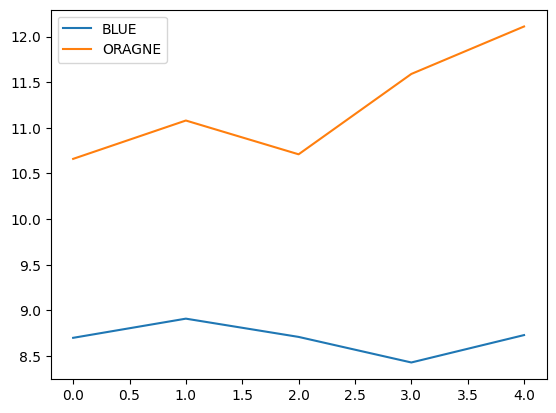

In [25]:
import matplotlib as mp
precios.plot()

In [26]:
%matplotlib inline

<Axes: >

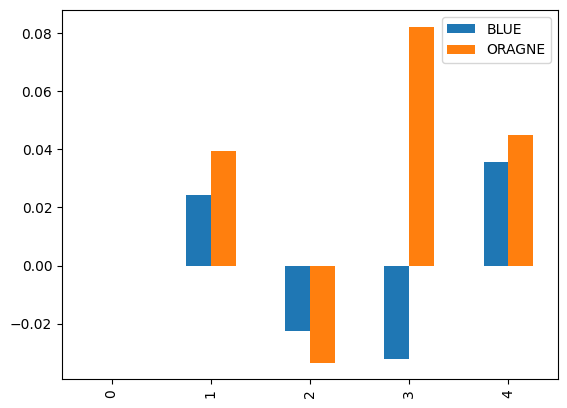

In [40]:
returns.plot.bar()

In [42]:
returns.std()

BLUE      0.033565
ORAGNE    0.048328
dtype: float64

In [43]:
returns.mean()

BLUE      0.001283
ORAGNE    0.033260
dtype: float64

In [44]:
returns +1

,BLUE,ORAGNE
0,NaN,NaN
1,1.024138,1.039400
2,0.977553,0.966606
3,0.967853,1.082166
4,1.035587,1.044866


In [46]:
np.prod(returns+1)-1

/Users/byemmanuel/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


BLUE      0.003448
ORAGNE    0.136023
dtype: float64

In [67]:
capital = np.array([54767,52666,50100,55300,55300,51428,52615,51771])
capital_frame = pd.DataFrame({"Capital" : [54767, 52666, 50100, 55300, 55300, 51428, 52615, 51771]})
capital_frame

,Capital
0,54767
1,52666
2,50100
3,55300
4,55300
5,51428
6,52615
7,51771


<Axes: >

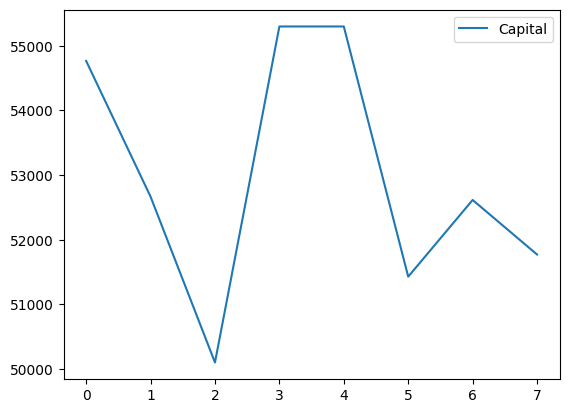

In [68]:
capital_frame.plot()

<Axes: >

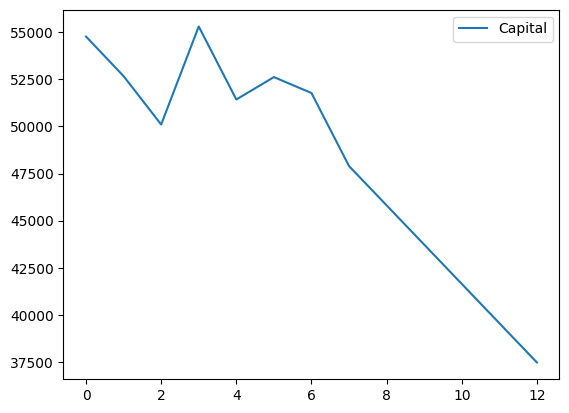

In [88]:
meses = (25000 / 12)
mes_actual = 49979

## 6 meses

array_capital_total = []


for i in range(0,12):
    mes_actual -= meses
    array_capital_total.append(mes_actual)

capital_frame = pd.DataFrame({"Capital" : [54767, 52666, 50100, 55300, 51428, 52615, 51771,  array_capital_total[0] , array_capital_total[1] , array_capital_total[2],array_capital_total[3], array_capital_total[4], array_capital_total[5] ]})
capital_frame.plot()

In [84]:
array_capital_total

[47895.666666666664,
 45812.33333333333,
 43728.99999999999,
 41645.66666666666,
 39562.33333333332,
 37478.999999999985,
 35395.66666666665,
 33312.333333333314,
 31228.99999999998,
 29145.66666666665,
 27062.333333333318,
 24978.999999999985]